<B><FONT FACE="Arial" SIZE="7"> ANALISIS 2016</FONT></B>

In [1]:
import numpy as np 
import pandas as pd
import calendar

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
filenames = ['properties/properati-AR-2016-01-01-properties-sell.csv', 
            'properties/properati-AR-2016-02-01-properties-sell.csv',
            'properties/properati-AR-2016-03-01-properties-sell.csv',
            'properties/properati-AR-2016-04-01-properties-sell.csv',
            'properties/properati-AR-2016-05-01-properties-sell.csv',
            'properties/properati-AR-2016-06-01-properties-sell.csv',
            'properties/properati-AR-2016-07-01-properties-sell.csv',
            'properties/properati-AR-2016-08-01-properties-sell.csv',
            'properties/properati-AR-2016-09-01-properties-sell.csv',
            'properties/properati-AR-2016-10-01-properties-sell.csv',
            'properties/properati-AR-2016-11-01-properties-sell.csv',
            'properties/properati-AR-2016-12-01-properties-sell.csv']

dataframes = []
for filename in filenames:
    dataframes.append(pd.read_csv(filename))

In [3]:
#Uno los dataframe
data = pd.DataFrame()
for dataframe in dataframes:
    data = pd.concat([data, dataframe]).drop_duplicates().reset_index(drop=True)


In [4]:
#Convertiremos la fecha de publicación
#Agregamos las series año y mes como columnas
def numero_de_mes_a_nombre(x):
    if x.month == 1: return '01 Enero'
    if x.month == 2: return '02 Febrero'
    if x.month == 3: return '03 Marzo'
    if x.month == 4: return '04 Abril'
    if x.month == 5: return '05 Mayo'
    if x.month == 6: return '06 Junio'
    if x.month == 7: return '07 Julio'
    if x.month == 8: return '08 Agosto'
    if x.month == 9: return '09 Septiembre'
    if x.month == 10: return '10 Octubre'
    if x.month == 11: return '11 Noviembre'
    if x.month == 12: return '12 Diciembre'


data['Date'] = pd.to_datetime(data['created_on'])
data['Anio'] = data['Date'].map(lambda x:x.year)
data['Mes'] = data['Date'].map(numero_de_mes_a_nombre)


In [5]:
#Chequeo los tipos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143251 entries, 0 to 143250
Data columns (total 30 columns):
id                            143251 non-null object
created_on                    143251 non-null object
operation                     143251 non-null object
property_type                 143251 non-null object
place_name                    143229 non-null object
place_with_parent_names       143251 non-null object
country_name                  143251 non-null object
state_name                    143251 non-null object
geonames_id                   121249 non-null float64
lat-lon                       113825 non-null object
lat                           113825 non-null float64
lon                           113825 non-null float64
price                         131660 non-null float64
currency                      121378 non-null object
price_aprox_local_currency    131660 non-null float64
price_aprox_usd               131660 non-null float64
surface_total_in_m2           91221

In [6]:
#Vista final del dataframe
data.head()

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,floor,rooms,expenses,properati_url,description,title,image_thumbnail,Date,Anio,Mes
0,6c0506bbb9df96cbf7b5b2f64fc594ddfe7b1235,2015-07-01,sell,house,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-38.011817,-57.5470291",...,NaN,5.0,NaN,http://www.properati.com.ar/rlor_venta_casa_ma...,"Lote 11, 25 x 26, Living Comedor en L 8,50x4,5...",CHAUVIN CHALET 4 DORMITORIOS C/ DEPENDENCIA,https://thumbs4.properati.com/0/j7bizx1makQIMP...,2015-07-01,2015,07 Julio
1,d758dcbe4f031408b5aa2890172359a410f43b47,2015-07-01,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.5745944268,-58.4192548517",...,NaN,1.0,1500.0,http://www.properati.com.ar/rlpn_venta_departa...,VENTA DEPARTAMENTO DE 1 AMBIENTE CON PATIO EN ...,Departamento en Palermo,https://thumbs4.properati.com/7/pc6PYWBGhUnn6u...,2015-07-01,2015,07 Julio
2,6fd3eeea15a5ce3baee2f45674949145610915bb,2015-07-01,sell,house,Lanús,|Argentina|Bs.As. G.B.A. Zona Sur|Lanús|Lanús|,Argentina,Bs.As. G.B.A. Zona Sur,NaN,NaN,...,NaN,NaN,NaN,http://www.properati.com.ar/rlq6_venta_casa_lanus,None- Estado del inmueble: EXCELENTE- Mejoras:...,.,NaN,2015-07-01,2015,07 Julio
3,5bc097e3828edf6d418c182dc229d60e497d0ce8,2015-07-01,sell,house,Temperley,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Argentina,Bs.As. G.B.A. Zona Sur,3427776.0,"-34.7890466,-58.4135609",...,NaN,NaN,NaN,http://www.properati.com.ar/rlq7_venta_casa_te...,"Muy buen Chalet, a 2 cuadras e Hipermeracado J...",Casa en Temperley Oeste,https://thumbs4.properati.com/2/4Gkhh9RmHVLM6_...,2015-07-01,2015,07 Julio
4,6fc22ab45c641532594ef8fecd145117ab1c6cbf,2015-07-01,sell,house,Lomas de Zamora,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Argentina,Bs.As. G.B.A. Zona Sur,NaN,"-34.7507803881,-58.3734663672",...,NaN,NaN,NaN,http://www.properati.com.ar/rlq9_venta_casa_lo...,None- Estado del inmueble: REGULAR- Tiene gara...,Casa en Lomas de Zamora Oeste,https://thumbs4.properati.com/3/GirmoJ_563ED0N...,2015-07-01,2015,07 Julio


In [7]:
#Tenemos que tener en cuenta solamente CABA y Gran Buenos Aires, por lo que debemos filtrarlas.
data.shape

(143251, 30)

In [8]:
data = data.loc[(data.state_name.str.contains('G.B.A')) | (data.state_name.str.contains('Capital Federal')), :]
data.shape

(101612, 30)

Se filtraon 41639 publicaciones

In [9]:
#Estamos trabajando con las de 2016 nada mas. Filtramos las otras.
data = data.loc[data.Anio == 2016, :]
data.shape

(80138, 30)

Se filtraron 21474 publicaciones

In [10]:
data.columns


Index([u'id', u'created_on', u'operation', u'property_type', u'place_name',
       u'place_with_parent_names', u'country_name', u'state_name',
       u'geonames_id', u'lat-lon', u'lat', u'lon', u'price', u'currency',
       u'price_aprox_local_currency', u'price_aprox_usd',
       u'surface_total_in_m2', u'surface_covered_in_m2', u'price_usd_per_m2',
       u'price_per_m2', u'floor', u'rooms', u'expenses', u'properati_url',
       u'description', u'title', u'image_thumbnail', u'Date', u'Anio', u'Mes'],
      dtype='object')

In [11]:
#Visualizo las columnas del medio que no se pueden apreciar
data.loc[:, ['lat-lon','lat',
       'lon', u'price', 'currency', 'price_aprox_local_currency',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'price_per_m2', 'floor', 'rooms', 'expenses']].head()

,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
10634,"-34.615974,-58.438168",-34.615974,-58.438168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10635,"-34.6021709,-58.4576624",-34.602171,-58.457662,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN
10642,"-34.4036891829,-58.756190946",-34.403689,-58.756191,178000.0,USD,2842393.0,178000.0,230.0,180.0,773.913043,988.888889,NaN,7.0,NaN
10643,"-34.5644922,-58.47238",-34.564492,-58.472380,NaN,NaN,NaN,NaN,32.0,30.0,NaN,NaN,NaN,NaN,NaN
10644,"-34.5644922,-58.47238",-34.564492,-58.472380,NaN,NaN,NaN,NaN,60.0,47.0,NaN,NaN,NaN,NaN,NaN


In [12]:
data.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,Anio
count,6.380600e+04,63282.000000,63282.000000,7.593300e+04,7.593300e+04,7.593300e+04,55617.000000,68689.000000,4.699100e+04,6.291100e+04,10351.000000,48218.000000,9594.000000,80138.0
mean,3.503265e+06,-34.571615,-58.519601,3.028644e+05,3.847896e+06,2.409679e+05,251.677814,150.262371,1.904068e+03,3.694225e+03,16.763501,3.027666,3117.165833,2016.0
std,4.566917e+05,1.163268,1.049883,7.049635e+05,6.005088e+06,3.760583e+05,1646.471368,3882.348364,6.057877e+03,1.060099e+04,118.175115,1.479387,8474.931215,0.0
min,3.427208e+06,-38.952611,-122.419415,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,6.275958e-02,1.000000,1.000000,1.000000,2016.0
25%,3.429617e+06,-34.633140,-58.579658,9.460000e+04,1.437165e+06,9.000000e+04,48.000000,46.000000,1.065990e+03,1.527778e+03,2.000000,2.000000,1000.000000,2016.0
50%,3.430787e+06,-34.596355,-58.480479,1.600000e+05,2.395275e+06,1.500000e+05,91.000000,78.000000,1.727273e+03,2.053571e+03,3.000000,3.000000,1800.000000,2016.0
75%,3.435607e+06,-34.537734,-58.413649,3.000000e+05,4.391338e+06,2.750000e+05,234.000000,160.000000,2.369048e+03,2.806452e+03,6.000000,4.000000,3500.000000,2016.0
max,6.693230e+06,37.774929,3.379206,1.234568e+08,7.984250e+08,5.000000e+07,192014.000000,987897.000000,1.271027e+06,1.016822e+06,6072.000000,32.000000,500000.000000,2016.0


In [13]:
data.shape

(80138, 30)

In [14]:
#Podemos observar que hay publicaciones de precio y superficie 0. Por lo tanto hay que filtrarlas.
data = data.loc[(data.surface_total_in_m2 != 0.0), :]
data = data.loc[(data.price_aprox_usd != 0.0), :]
data.shape

(72080, 30)

Se filtraron 8058 publicaciones

In [15]:
data.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,Anio
count,5.737700e+04,56712.000000,56712.000000,6.816900e+04,6.816900e+04,6.816900e+04,49552.000000,63160.000000,4.698700e+04,5.998700e+04,9696.000000,43120.000000,8711.000000,72080.0
mean,3.507229e+06,-34.564128,-58.527363,3.214704e+05,4.063713e+06,2.544831e+05,274.849673,148.588078,1.904230e+03,3.743487e+03,16.877888,2.988451,3138.077029,2016.0
std,4.706444e+05,1.227143,1.102325,7.344671e+05,6.158779e+06,3.856830e+05,1741.059589,3978.770262,6.058110e+03,1.078267e+04,105.245961,1.458393,8828.268982,0.0
min,3.427208e+06,-38.952611,-122.419415,2.600000e+03,7.746862e+04,4.851340e+03,10.000000,0.000000,1.000000e+00,6.275958e-02,1.000000,1.000000,1.000000,2016.0
25%,3.429595e+06,-34.629974,-58.579658,1.000000e+05,1.532976e+06,9.600000e+04,55.000000,46.000000,1.066522e+03,1.530612e+03,2.000000,2.000000,1000.000000,2016.0
50%,3.430596e+06,-34.595648,-58.480399,1.691470e+05,2.538992e+06,1.590000e+05,103.000000,78.000000,1.727273e+03,2.058824e+03,3.000000,3.000000,1800.000000,2016.0
75%,3.435607e+06,-34.537631,-58.415671,3.200000e+05,4.551022e+06,2.850000e+05,251.000000,161.000000,2.369048e+03,2.820513e+03,6.000000,4.000000,3456.000000,2016.0
max,6.693230e+06,37.774929,3.379206,1.234568e+08,7.984250e+08,5.000000e+07,192014.000000,987897.000000,1.271027e+06,1.016822e+06,2177.000000,32.000000,500000.000000,2016.0


<br><B><FONT FACE="Arial" SIZE="5">1) Analisis de la cantidad de publicaciones segun tipo de propiedad,zona, caracteristicas</FONT></B><br/>
<br><B><FONT FACE="Arial" SIZE="3">El fin de estos plots es mostrar la relacion entre la cantidad de publicaciones y el tipo de propiedad, sus caracteristicas y su locacion</FONT></B><br/>


<br><B><FONT FACE="Arial" SIZE="3">¿Que tipo de propiedad se puso mas en venta?</FONT></B><br/>

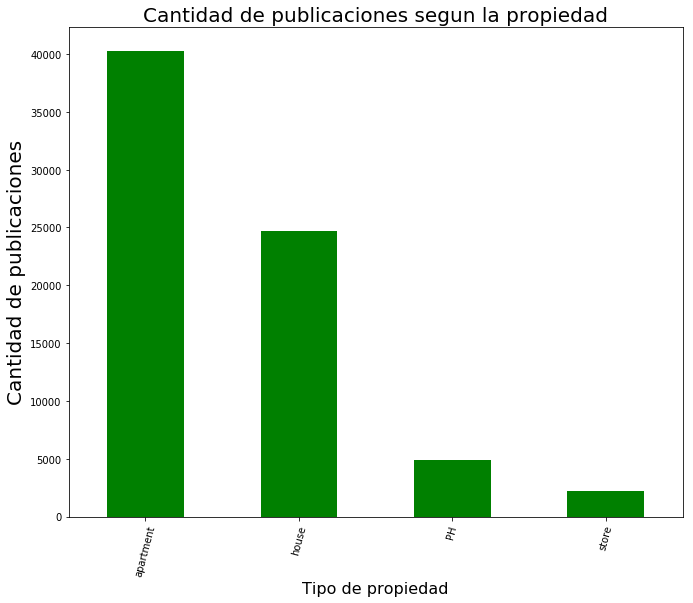

In [16]:
data['property_type'].value_counts().plot(kind='bar', color='green', rot=75, figsize=(11,9))
plt.title('Cantidad de publicaciones segun la propiedad', fontsize=20);
plt.xlabel('Tipo de propiedad', fontsize=16);
plt.ylabel('Cantidad de publicaciones', fontsize=20);

Los departametos son los que mas en venta se ponen.

<br><B><FONT FACE="Arial" SIZE="3">¿En que mes se publica la mayor cantidad de cada tipo de propiedad?</FONT></B><br/>
<br><B><FONT FACE="Arial" SIZE="3">¿Que tipo de propiedad se publica mas en cada vez?</FONT></B><br/>

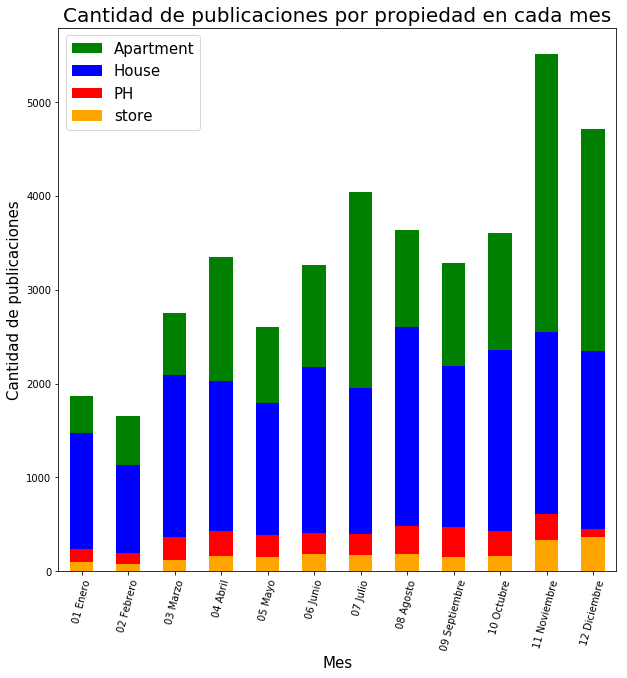

In [17]:
data.loc[data.property_type.str.contains('apartment'), ['Mes', 'property_type']].groupby('Mes').size().\
    plot(kind='bar', color='green', rot=75, figsize=(10,10))
plt.gca()
data.loc[data.property_type.str.contains('house'), ['Mes', 'property_type']].groupby('Mes').size().\
    plot(kind='bar', color='blue', rot=75, figsize=(10,10))
plt.gca()
data.loc[data.property_type.str.contains('PH'), ['Mes', 'property_type']].groupby('Mes').size().\
    plot(kind='bar', color='red', rot=75, figsize=(10,10))
plt.gca()
data.loc[data.property_type.str.contains('store'), ['Mes', 'property_type']].groupby('Mes').size().\
    plot(kind='bar', color='orange', rot=75, figsize=(10,10))
plt.xlabel('Mes', fontsize=15);
plt.ylabel('Cantidad de publicaciones', fontsize=15);
plt.title('Cantidad de publicaciones por propiedad en cada mes', fontsize=20);
plt.legend(['Apartment', 'House', 'PH', 'store'], fontsize=15);

<br><B><FONT FACE="Arial" SIZE="3">Entre GBA y CABA, ¿Donde se realizaron mayor cantidad de publicaciones?</FONT></B><br/>

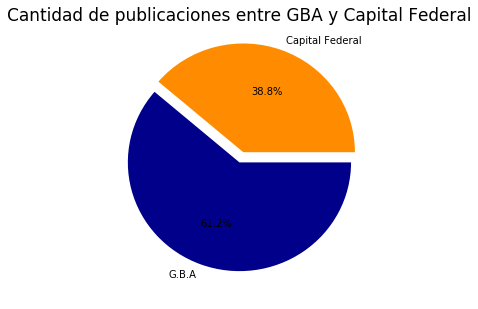

In [18]:
capital_federal = data.loc[data.state_name.str.contains('Capital Federal') == True]
gba = data.loc[data.state_name.str.contains('G.B.A') == True]
zonas = [capital_federal.size, gba.size]
nombres = ['Capital Federal', 'G.B.A']

plt.figure(figsize=(5, 5))
plt.title('Cantidad de publicaciones entre GBA y Capital Federal', fontsize=17)
plt.pie(zonas, labels=nombres, autopct='%1.1f%%', colors=['DarkOrange', 'DarkBlue'], explode=(0.1, 0))
plt.show()

<br><B><FONT FACE="Arial" SIZE="3">¿Cuales son las 10 localidades con mayor cantidad de publicaciones?</FONT></B><br/>

In [19]:
data.groupby('place_name').size().sort_values(ascending=False).head(10)

place_name
Nordelta        3262
Tigre           2741
Palermo         2562
Ramos Mejía     2409
Belgrano        2236
Pilar           1830
Caballito       1722
Olivos          1603
Villa Crespo    1359
Benavidez       1350
dtype: int64

<br><B><FONT FACE="Arial" SIZE="3">¿En que lat-lon se concentra la mayor cantidad de publicaciones?</FONT></B><br/>

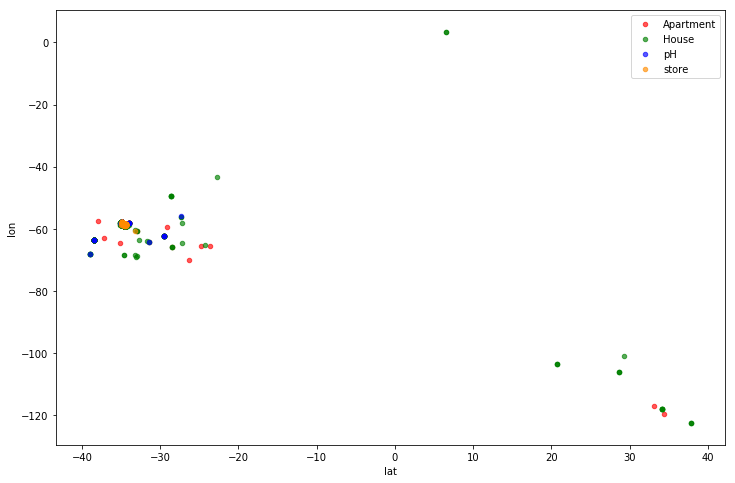

In [20]:
data.loc[data.property_type.str.contains('apartment'), :].\
    plot.scatter(x='lat', y='lon', color='Red', alpha=0.65, label='Apartment')
ax = plt.gca()
data.loc[data.property_type.str.contains('house'), :].\
    plot.scatter(x='lat', y='lon', color='Green', alpha=0.65, ax = ax, label='House')
ax = plt.gca()
data.loc[data.property_type.str.contains('PH'), :].\
    plot.scatter(x='lat', y='lon', color='Blue', alpha=0.65, ax = ax, label='pH', figsize=(12,8))
ax = plt.gca()
data.loc[data.property_type.str.contains('store'), :].\
    plot.scatter(x='lat', y='lon', color='DarkOrange', alpha=0.65, ax = ax, label='store', figsize=(12,8))
    

<br><B><FONT FACE="Arial" SIZE="5">2) Analisis de las caracteristicas de las publicaciones</FONT></B><br/>


<br><B><FONT FACE="Arial" SIZE="3">Analizaremos que caracteriza a las publicaciones</FONT></B><br/>
<br><B><FONT FACE="Arial" SIZE="3">¿Que relacion hay entre el tipo de propiedad y el precio?</FONT></B><br/>

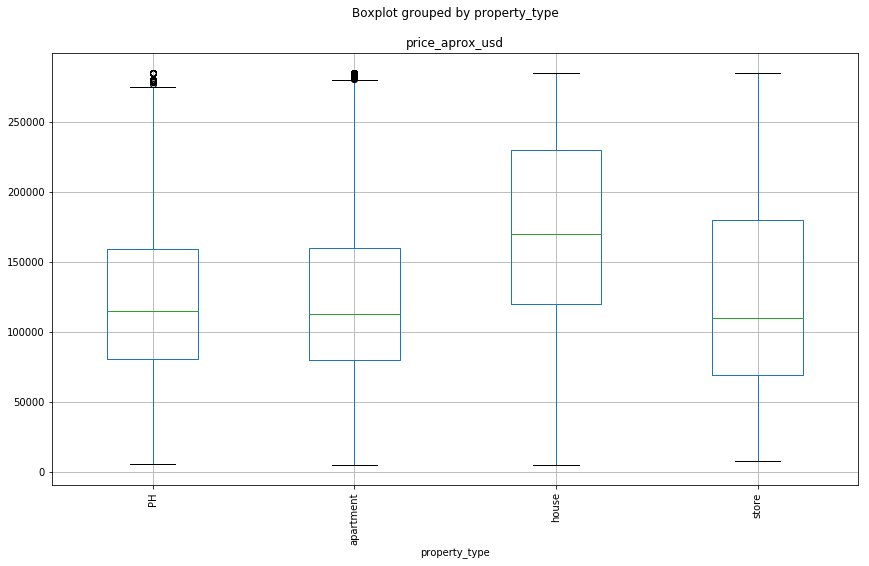

In [21]:
data.loc[(data.price_aprox_usd >= 4.851340e+03) & (data.price_aprox_usd <= 2.850000e+05), :].\
                            boxplot('price_aprox_usd',by='property_type',figsize=(14,8),rot=90)

<br><B><FONT FACE="Arial" SIZE="3">¿Influye la cantidad de habitaciones en el precio?</FONT></B><br/>

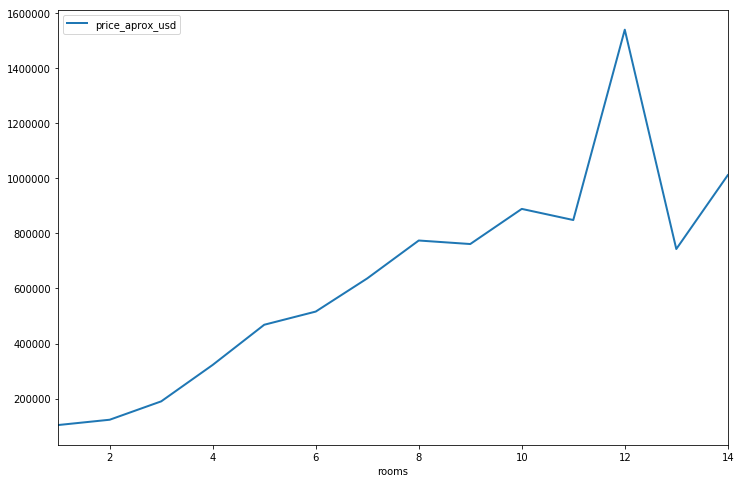

In [22]:
#Nos interesan las publicaciones mas comunes con menos de 15 habitaciones
data.loc[data.rooms < 15, ['price_aprox_usd', 'rooms']].groupby('rooms').mean().\
                                                plot(kind='line', linewidth=2,figsize=(12,8))

<br><B><FONT FACE="Arial" SIZE="3">¿Aumento el precio del m2?</FONT></B><br/>

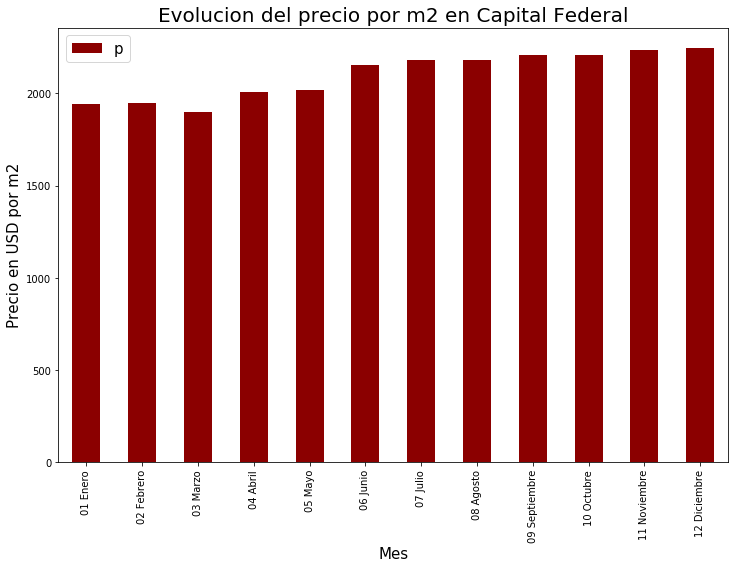

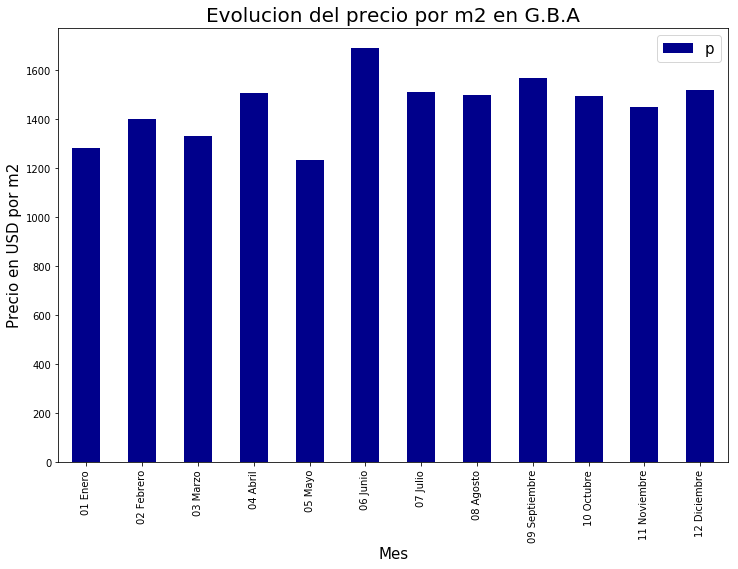

In [23]:
plt.ion()
#Filtro los precios mas comunes para que ensucian el resultado
filtro = data.loc[(data.price_aprox_usd >= 4.851340e+03) & (data.price_aprox_usd <= 2.850000e+05), :]
#En capital federal
filtro.loc[data.state_name.str.contains('Capital Federal'), ['price_usd_per_m2', 'Mes']].groupby('Mes').\
                        mean().plot(kind='bar',rot=90, figsize=(12,8), color='DarkRed')
plt.xlabel('Mes', fontsize=15);
plt.ylabel('Precio en USD por m2', fontsize=15);
plt.title('Evolucion del precio por m2 en Capital Federal', fontsize=20);
plt.legend('precio_usd_por_m2', fontsize=15);
#En G.B.A
filtro.loc[data.state_name.str.contains('G.B.A'), ['price_usd_per_m2', 'Mes']].groupby('Mes').\
                        mean().plot(kind='bar',rot=90, figsize=(12,8), color='DarkBlue')
plt.xlabel('Mes', fontsize=15);
plt.ylabel('Precio en USD por m2', fontsize=15);
plt.title('Evolucion del precio por m2 en G.B.A', fontsize=20);
plt.legend('precio_usd_por_m2', fontsize=15);

<br><B><FONT FACE="Arial" SIZE="3">¿Influyen las caracteristicas de la zona en los precios?</FONT></B><br/>

In [50]:
# corregimos el campo de coordenadas del dataset.
def coord(c):
    lat_lon = c.split(',')
    return [float(lat_lon[0]), float(lat_lon[1])]

caballito = data.loc[data.property_type.str.contains('apartment'), :]
caballito = caballito.loc[(data.price_aprox_usd >= 4.851340e+03) & (data.price_aprox_usd <= 2.850000e+05), :]
caballito = caballito.loc[(data.lat < -34.610913) & (data.lat > -34.635746), :]
caballito = caballito.loc[(data.lon < -58.429233) & (data.lon > -58.457520), :]
caballito = caballito.loc[data.place_name.str.contains('Caballito', na=False), :][['id', 'price_usd_per_m2', 'lat-lon']]
caballito.dropna(inplace=True)
caballito['lat-lon'] = caballito['lat-lon'].apply(coord)
caballito.shape

(411, 3)

In [51]:
import folium
# creamos el mapa con folium
mapa = folium.Map(location=[-34.619231, -58.443699], zoom_start=17)


In [52]:
for index, row in caballito.iterrows():
    folium.Marker(location=row['lat-lon'], popup=row['id'], icon=folium.Icon(color='green')).add_to(mapa)

In [53]:
mapa

In [54]:
#Casas a medida que nos alejamos de av de mayo
data[data.id.str.contains('1d3db3980fda390d9c75adbb8c4f55ee6dd83edf') == True]['price_usd_per_m2']

44598    2826.086957
Name: price_usd_per_m2, dtype: float64

In [55]:
data[data.id.str.contains('86bed9445dcc04787cf6ff25e4e106db377c62e0') == True]['price_usd_per_m2']

92487    2673.076923
Name: price_usd_per_m2, dtype: float64

In [56]:
data[data.id.str.contains('79cec928e1054e96d161148c98715fb0e3c02c3e') == True]['price_usd_per_m2']

142341    1831.395349
Name: price_usd_per_m2, dtype: float64

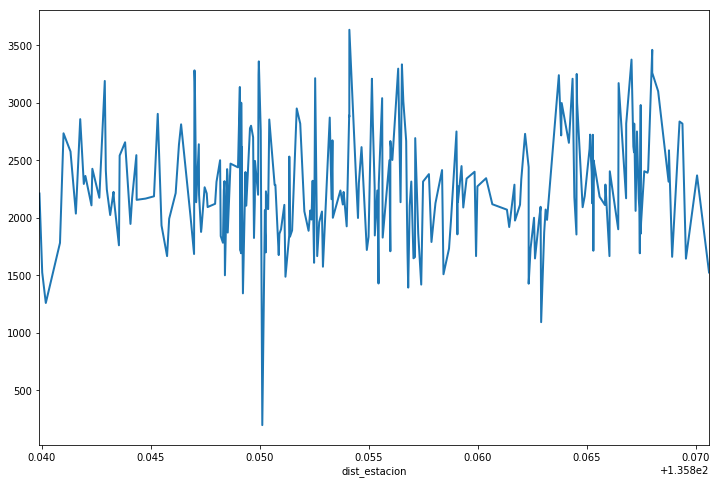

In [58]:
#Precio en funcion a la distancia(radio aprox) de la estacion de caballito
def distancia_estacion(prop):
       return  pow(pow(prop[0]-34.619189, 2) +  pow(prop[1]-58.443682, 2), 0.5)
    
caballito['dist_estacion'] = caballito['lat-lon'].apply(distancia_estacion)

caballito.groupby('dist_estacion').mean().loc[:, 'price_usd_per_m2'].\
                                                plot(kind='line', linewidth=2,figsize=(12,8))


In [60]:
caballito.describe()

,price_usd_per_m2,dist_estacion
count,411.000000,411.000000
mean,2307.442072,135.856376
std,506.219265,0.007861
min,115.368824,135.839892
25%,1998.000000,135.849942
50%,2254.901961,135.857118
75%,2605.930587,135.862975
max,3686.274510,135.870607


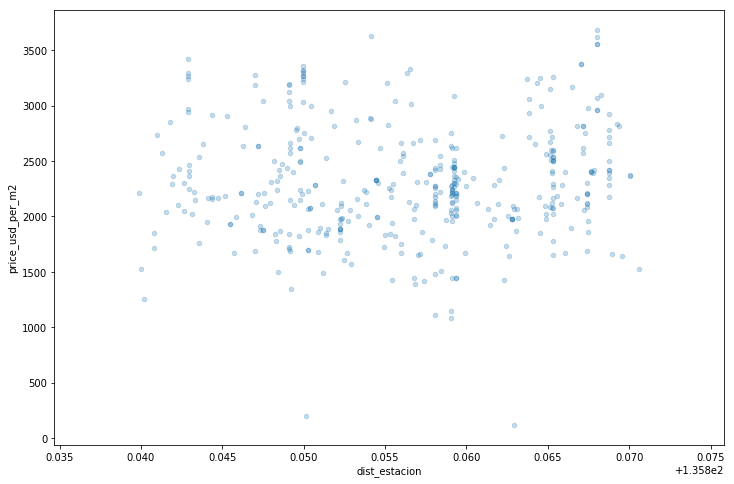

In [61]:
caballito.plot.scatter('dist_estacion','price_usd_per_m2',alpha=0.25,figsize=(12,8));